<a href="https://colab.research.google.com/github/giaminh8368/Samsung-Innovation-Campus/blob/main/Chapter%209/ex_0702.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


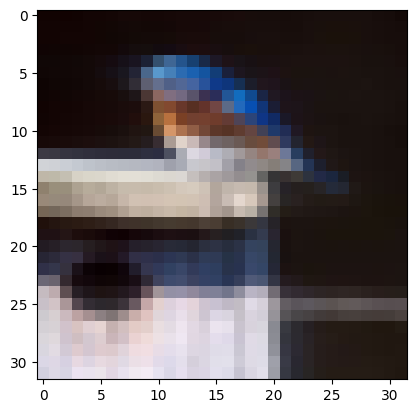

In [26]:
i_image= 13
a_single_image= X_train[i_image,:,:,:]
plt.imshow(a_single_image)
plt.show()

In [6]:
# Scaling.
X_train = X_train/255
X_test = X_test/255

In [19]:
batch_size = 8
n_epochs  = 14
learn_rate = 0.0001

In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))

model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(7, 7),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_1', activation=None))
model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_1'))
model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_2'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1',
    activation='relu'))
# Dropout layer
model.add(tf.keras.layers.Dropout(
    rate=0.5))
model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'))

#### 1.7. Define the loss function and the optimizer:

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = learn_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                 │ (None, 32, 32, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,261,578 (16.26 MB)

 Trainable params: 4,261,578 (16.26 MB)

 Non-trainable params: 0 (0.00 B)

#### 1.8. Training and Testing:

In [24]:
history = model.fit(X_train, y_train, epochs=n_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    shuffle=True)

Epoch 1/14
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.3864 - loss: 1.6939 - val_accuracy: 0.5644 - val_loss: 1.2175
Epoch 2/14
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.5895 - loss: 1.1737 - val_accuracy: 0.6392 - val_loss: 1.0310
Epoch 3/14
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.6473 - loss: 1.0048 - val_accuracy: 0.6658 - val_loss: 0.9485
Epoch 4/14
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.6855 - loss: 0.8955 - val_accuracy: 0.6891 - val_loss: 0.8938
Epoch 5/14
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.7250 - loss: 0.7911 - val_accuracy: 0.7044 - val_loss: 0.8586
Epoch 6/14
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.7492 - loss: 0.7165 - val_accuracy: 0.7160 - val_loss: 0.8382
Epoch 7/14
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.7785 - loss: 0.6362 - val_accuracy: 0.7159 - val_loss: 0.8428
Epoch 8/14
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.8041 - loss: 0

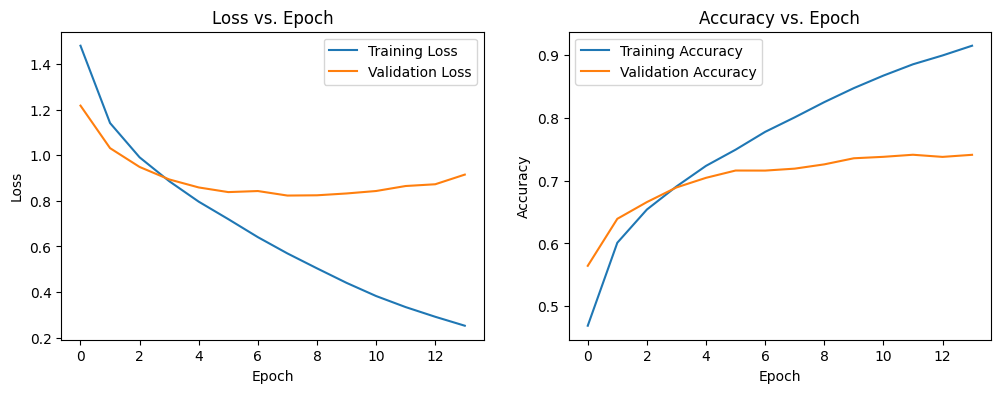

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7444 - loss: 0.9096
Test Loss: 0.9149
Test Accuracy: 0.7410


In [25]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.show()

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")